# Welcome to Kaggle's Battle of Genders

# Index

* Introduction
* Brief Overview
* Data Analysis
* Conclusion

# Introduction


### Welcome! Let’s start by introducing this project objective. Its purpose it’s to analyze the kaggler survey and then try to find any pattern at all within this data. However, In order to make it more interesting why don’t we make it a competition a challenge? Then, how about a battle between genders? In other words, let’s  find some correlation within the data for each gender, and compare each two. Rivalry is what we need. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import re
from matplotlib.pyplot import figure
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('../input/multipleChoiceResponses.csv', low_memory=False)
gender = data['Q1']


# Brief Overview

### First of all, I think it’s important to clarify the three groups. The first groups are the females, then the males and last but not least the others who are people, who didn’t choose one of the other twp. So then lets create a bar chart to see how many people of each category took the survey. 


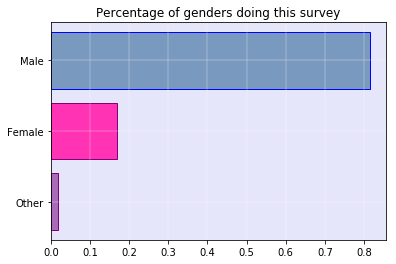

there is a total of 4010 females, around 16.80637049455155 %
there is a total of 19430 males, around 81.43336127409891 %
there is a total of 420 who did not choose or prefer not to choose gender, around 1.760268231349539 %


In [5]:
gCopy = gender.copy()

female_count = gCopy.str.count('Female').sum()
male_count = gCopy.str.count('Male').sum()
other_count = len(gCopy)-(female_count+male_count)

barcount = [  other_count/len(gCopy),female_count/len(gCopy),male_count/len(gCopy)]
barinfo = [ 'Other','Female','Male']
y_pos = np.arange(len(barinfo))
total = female_count+ male_count + other_count
# Create horizontal bars
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.barh(y_pos, barcount, color=[(0.6, 0.3, 0.65, 0.8),(1, 0.2, 0.7, 1),(0.2, 0.4, 0.6, 0.6) ],
         edgecolor=['purple','purple','blue'])
plt.title('Percentage of genders doing this survey')
plt.yticks(y_pos, barinfo)
ax.set_facecolor('lavender')
plt.grid( linestyle='-', linewidth=0.3, color='white')
plt.show()
print('there is a total of', female_count, 'females, around', 100*female_count/total, '%')
print('there is a total of', male_count, 'males, around', 100*male_count/total, '%')
print('there is a total of', other_count, 'who did not choose or prefer not to choose gender, around', 100*other_count/total,'%')

### Based on this results we see that around 81 percent are males and 17 percent are females and the others are around 2 percent. So, for now the males have the advantages with more people, but is this really an advantage?

In [9]:
def organizeTitle (fi,mi,oi,title):
    titles = []
    titles.append(title[1])
    for i in range(1,len(title)):
        c = 0
        for j in range(0,len(titles)):
            if(titles[j]== title[i]):
                c =1
        if(c==0):
            if(title[i]!='0'):
                titles.append(title[i])


    titles = np.asarray(titles)
    resultado = []
    resultado2 = []
    s = title[fi]
    m = np.where(title[fi]=='Data Scientist')

    for i in range(0,len(titles)):
        f = len(title[np.where(title[fi]==titles[i])])
        m = len(title[np.where(title[mi]== titles[i])])
        o = len(title[np.where(title[oi]== titles[i])])
        total = f+m+o
        if(titles[i]!='0'):
            c1 = [titles[i],100*f/total,100* m/total, 100*o/total]
            c2 = [titles[i],100*f/(len(title[fi])),100* m/(len(title[mi])),100* o/len(title[oi])]
            resultado.append(c1)
            resultado2.append(c2)
        
    resultado = np.asarray(resultado)
    resultado2 = np.asarray(resultado2)
    return resultado, resultado2, titles


In [10]:
def plot1(r1,r2,t,mess):
    # plot
    barWidth = 0.85
    names = t
    orangeBars = list(r1[:,1])

    blueBars = list(r1[:,2])
    greenBars = list(r1[:,3])
    r = list(np.linspace(0,len(greenBars),len(greenBars)))

    for i in range(0,len(orangeBars)):
        orangeBars[i] = float(orangeBars[i])
        blueBars[i] = float(blueBars[i])
        greenBars[i] = float(greenBars[i])

    # Create green Bars
    plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
    # Create orange Bars
    plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
    # Create blue Bars
    plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

    # Custom x axis
    plt.rcParams["figure.figsize"] = (15,4)
    plt.xticks(r, names)
    plt.xlabel("titles")
    plt.xticks(rotation=90)
    plt.title(mess)
    # Show graphic
    plt.show()

In [15]:
def plot2(r1,r2,t,mess):
    barwidth = 0.3
    names = t
    orangeBars = list(r2[:,1])
    blueBars = list(r2[:,2])
    greenBars = list(r2[:,3])
    r = list(np.linspace(0,len(greenBars),len(greenBars)))
    rr2 = list(np.linspace(r[0]+barwidth,r[len(r)-1]+barwidth,len(greenBars)))
    rr3 = list(np.linspace(rr2[0]+barwidth,rr2[len(rr2)-1]+barwidth,len(greenBars)))

    for i in range(0,len(orangeBars)):
        orangeBars[i] = float(orangeBars[i])
        blueBars[i] = float(blueBars[i])
        greenBars[i] = float(greenBars[i])
    
    plt.rcParams["figure.figsize"] = (15,5)
    plt.bar(r, orangeBars, width = barwidth, color = '#f9bc86', edgecolor = 'white', label='female')

    plt.bar(rr2, blueBars, width = barwidth, color = '#a3acff', edgecolor = 'white',  label='male')

    plt.bar(rr3, greenBars, width = barwidth, color = '#b5ffb9', edgecolor = 'white',  label='other')

    plt.ylabel('porcentage')
    plt.legend()
    plt.xticks(rr2,names)
    plt.xticks(rotation=90)
    plt.title(mess)
    # Show graphic
    plt.show()


# Data Analysis

### For now let’s start by trying to analyze the survey results, for each different question. As there are many questions I took the liberty to choose the following questions: 1) Age 2) Occupation 3) Level of study 4) Salary and finally comparing salary vs. time working as a data scientist. 

### Its important to analyze the age between each group in order to have a better view in who are our survey takers. 


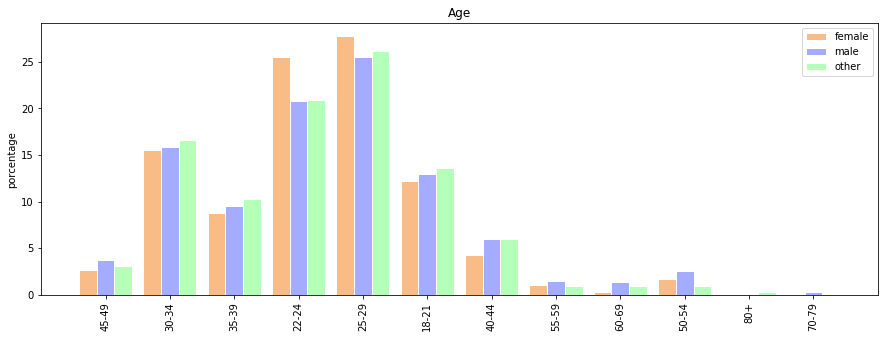

In [16]:
title = data['Q2']
title.fillna(0, inplace=True)
title = np.asarray(title)
gCopy = np.asarray(gCopy)
mess = 'Age'

female_i = np.where(gCopy == 'Female')
male_i = np.where(gCopy == 'Male')
other_i = np.where(gCopy[np.where(gCopy!='Male')]!= 'Female')

r1, r2, t = organizeTitle(female_i,male_i,other_i,title)

plot2(r1,r2,t,mess)


### As a result we can see that most of the people who took the survey are from the age of 22- 29 for both of the 3 groups.

### Now let’s start the analysis with the first question and that is Occupation. 

In [19]:

title = data['Q6']
title.fillna(0, inplace=True)
title = np.asarray(title)
gCopy = np.asarray(gCopy)

mess = "Occupation"
r1, r2, t = organizeTitle (female_i,male_i,other_i,title)


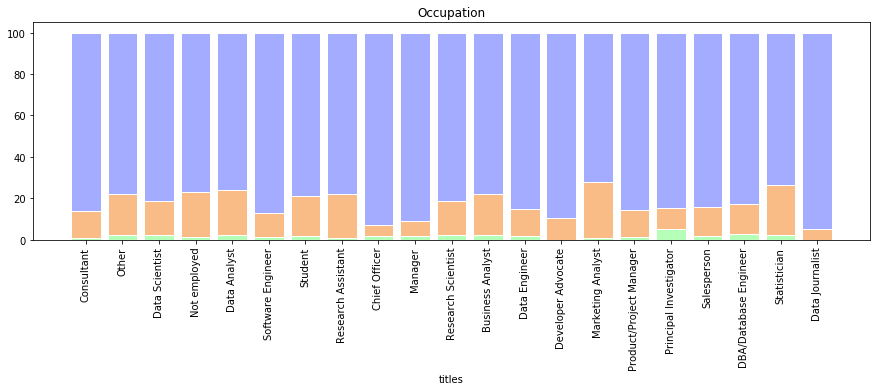

In [20]:
plot1(r1,r2,t,mess)

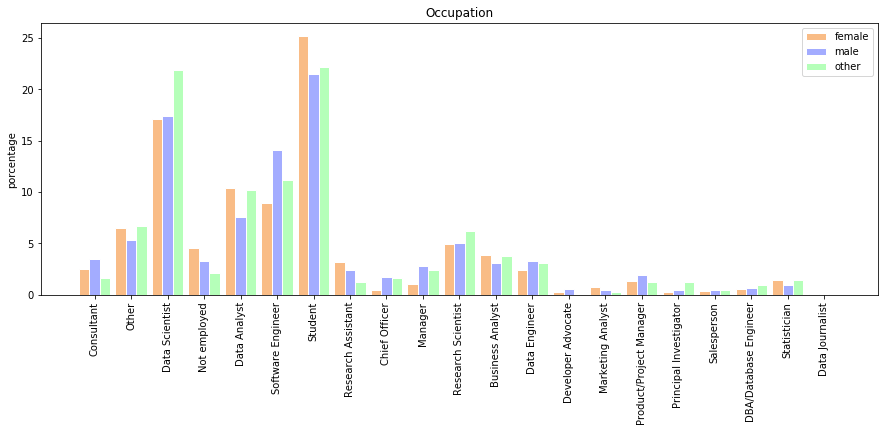

In [21]:
plot2(r1,r2,t,mess)

### For the first graph we see three colors, which represent: blue for male, orange for female and green for other. Something distinguishable is that blue covers most of the bars, but this is because 81 percent of the survey takers are males so the result is not surprising. However, comparing the percentage of each group and seen the graph it’s important to reveal that in comparison there are mostly girls who prefer to work in marketing analysis or that are working in this area. Also, there is a big bump for green in principal investigator. Lastly the males seem to overwhelm the other groups at chief officer and manager. Now something interesting is that there are way more male journalist than female, maybe is a misconception we put in ourselves. 


### Now for the second graph we can see that most of the test takers are students and this represents each group also. Additionally, is evident that males prefer to be software engineer rather than females, and females are more fixed as a data analyst rather than males. Now, from the previous bar chart those where we saw this domination in group with other like chief officer and marketing analysis or data journalist, is where there are fewer people. This tells us that not many people work in this area making it more visible this difference between each group. 

### Continuing with the next question, Academic level. Now what will our results be?

In [22]:

title = data['Q4']
title.fillna(0, inplace=True)
title = np.asarray(title)
gCopy = np.asarray(gCopy)
mess = 'Studies'
r1, r2, t = organizeTitle (female_i,male_i,other_i,title)


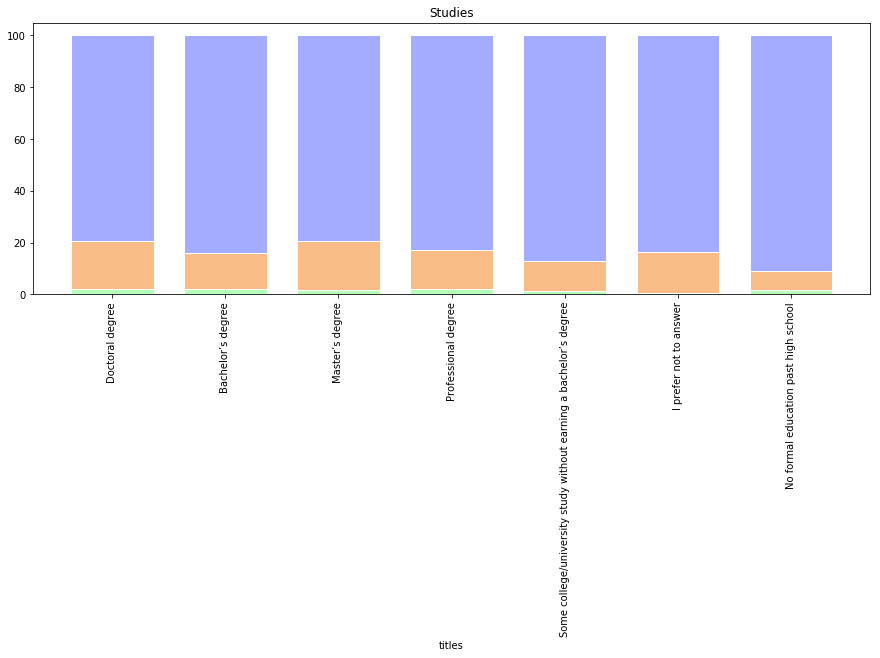

In [23]:
plot1(r1,r2,t,mess)

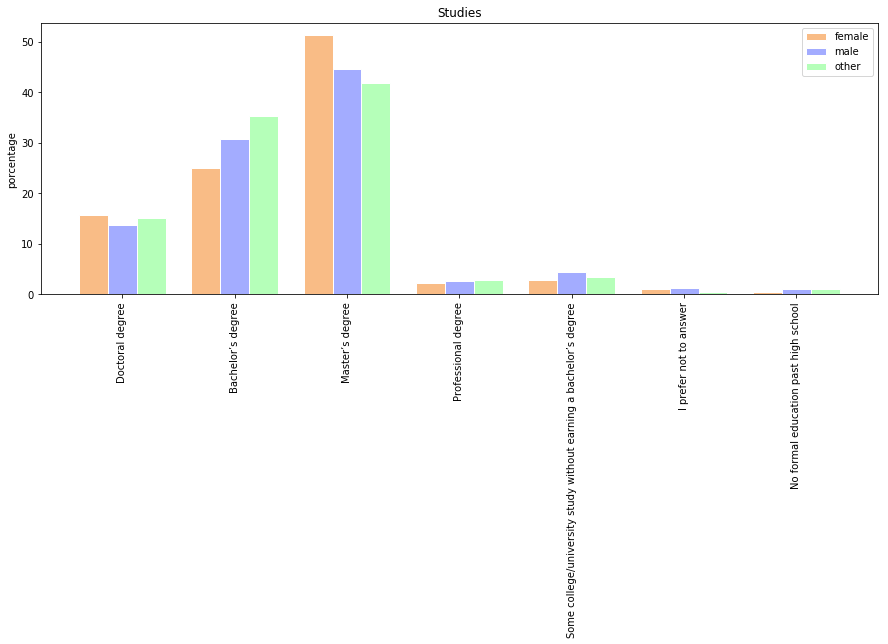

In [24]:
plot2(r1,r2,t,mess)

### Seen this results one must emphasizes that the majority of females then to have a master degree than males. Even though there are fewer female in this industry they tend to take up their level and leave males behind as their percentage is also bigger in PHD. One word, Respect. 

### Now it will become interest, how about we see a comparison between salaries? 

In [25]:
title = data['Q9']
title.fillna(0, inplace=True)
title = np.asarray(title)
gCopy = np.asarray(gCopy)
mess = 'Annual salary'
r1, r2, t = organizeTitle(female_i,male_i,other_i,title)

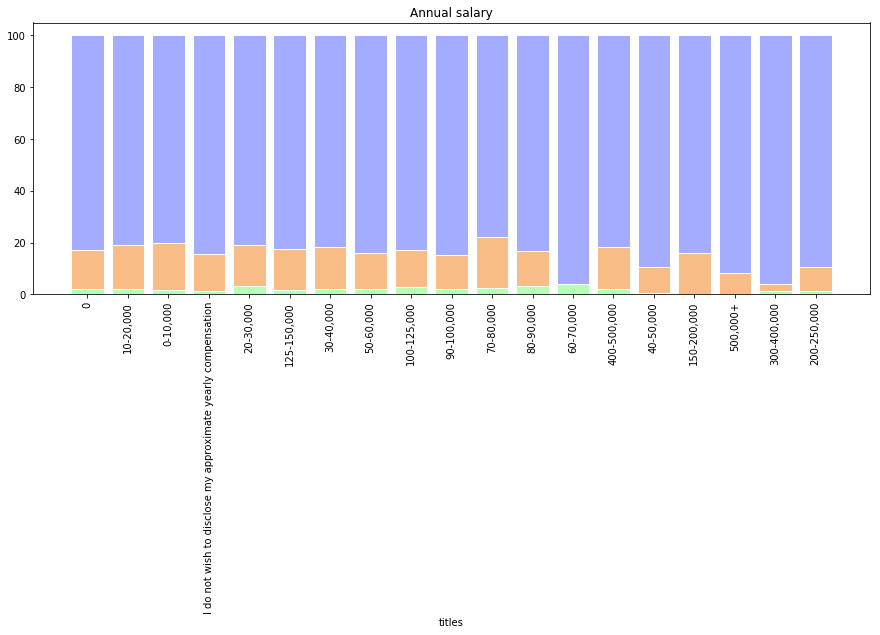

In [26]:
plot1(r1,r2,t,mess)

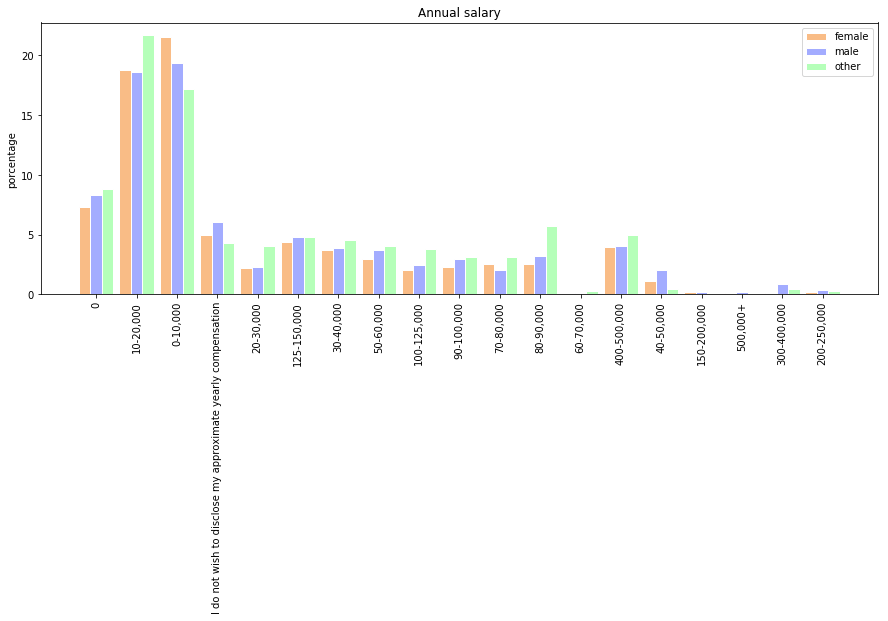

In [27]:
plot2(r1,r2,t,mess)

### First of all it seems that most of the people from the three groups have a salary of around 0-20000 dollars annually. Are data scientists bad paid?  The answer is not shown, but is probably that this salary comes through the students, as we saw before most of the survey takers are students, so is not rare if that is the case, in fact some are earning good for been students, let me express my a little of my envy. However, there are people who gain even more money, about 400-500 thousands, and they are not a few they consist of about 5 percent from each group, and knowing that males are 19430 then there are more than 500 people who have this salary. 

### Finally, let’s see how salary and experience compares within each group. 

In [28]:
def organizar(x, y):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
        (y[i], y[swap]) = (y[swap], y[i])
    return x, y

def plotx1x2(f,m,o,x1,x2,mess):
    
    fx1 = x1[f]
    mx1 = x1[m]
    ox1 = x1[o]
    
    fx2 = x2[f]
    mx2 = x2[m]
    ox2 = x2[o]
    
    fx11 = []
    fx22 = []
    mx11 = []
    mx22 = []
    ox11 = []
    ox22 = []
    
    for i in range(0, len(fx1)):
        if(fx1[i]!=0):
            if(fx2[i]!=0):
                if(fx2[i].find("do") == -1):
                    if(fx1[i].find("+")!=-1):
                        ff2 = float(re.split('[- +]',fx2[i])[0].replace(',',''))
                        if(ff2<500000):
                            fx11.append( float(fx1[i].split(' ')[0]))
                            fx22.append(ff2*10000+10000)
                    else:
                        ff2 = float(re.split('[- +]',fx2[i])[0].replace(',',''))
                        if(ff2<500000):
                            fx11.append( float(fx1[i].split('-')[0]))
                            fx22.append(ff2*10000+10000)
        else:
            if(fx2[i]!=0):
                if(fx2[i].find("do") == -1):
                    ff2 = float(re.split('[- +]',fx2[i])[0].replace(',',''))
                    if(ff2<500000):
                        fx11.append( float(fx1[i]))
                        fx22.append(ff2*10000+10000)
                    
    for i in range(0, len(mx1)):
        if(mx1[i]!=0):
            if(mx2[i]!=0):
                if(mx2[i].find("do") == -1):
                    if(mx1[i].find("+")!=-1):

                        ff2 = float(re.split('[- +]',mx2[i])[0].replace(',',''))
                        if(ff2<500000):
                            mx11.append( float(mx1[i].split(' ')[0]))
                            mx22.append(ff2*10000+10000)
                    else:
                        
                        ff2 = float(re.split('[- +]',mx2[i])[0].replace(',',''))
                        if(ff2<500000):
                            mx11.append( float(mx1[i].split('-')[0]))
                            mx22.append(ff2*10000+10000)
        else:
            if(mx2[i]!=0):
                if(mx2[i].find("do") == -1):
                    
                    ff2 = float(re.split('[- +]',mx2[i])[0].replace(',',''))
                    if(ff2<500000):
                        mx11.append( float(mx1[i]))
                        mx22.append(ff2*10000+10000)
                    
    for i in range(0, len(ox1)):
        if(ox1[i]!=0):
            if(ox2[i]!=0):
                if(ox1[i].find("How") == -1 and ox2[i].find('I')==-1):
                    if(ox1[i].find("+")!=-1):
                        ox11.append( float(ox1[i].split(' ')[0]))
                        ox22.append(float(re.split('[- +]',ox2[i])[0].replace(',',''))*10000+10000)
                    else:
                        ox11.append( float(ox1[i].split('-')[0].replace(',','')))
                        ox22.append(float(re.split('[- +]',ox2[i])[0].replace(',',''))*10000+10000)
        else:
            if(ox2[i]!=0):
                if(ox2[i].find("I") == -1):
                    ox11.append( float(ox1[i]))
                    ox22.append(float(re.split('[- +]',ox2[i])[0].replace(',',''))*10000+10000)
    
    l =[]
    l.append(fx11[0])
    for i in range(0,len(fx11)):
        c = 0
        for j in range(0,len(l)):
            if(l[j]== fx11[i]):
                c =1
        if(c==0):
            if(title[i]!='0'):
                l.append(fx11[i])   
    fl =[]
    ml =[]
    ol =[]
    fx11 = np.asarray(fx11)
    fx22 = np.asarray(fx22)
    mx11 = np.asarray(mx11)
    mx22 = np.asarray(mx22)
    ox11 = np.asarray(ox11)
    ox22 = np.asarray(ox22)
    
    for i in range(0, len(l)):
        
        sfl = np.where(fx11==l[i])
        fl.append(np.mean(fx22[sfl]))
        ml.append(np.mean(mx22[np.where(mx11==l[i])]))
        ol.append(np.mean(ox22[np.where(ox11==l[i])]))
        
    plt.style.use('seaborn-darkgrid')
    plt.rcParams["figure.figsize"] = (15,10)
    plt.subplot(2,2,1)
    plt.scatter(fx11,fx22)
    x,y = organizar(l,fl)
    plt.plot(x,y,'red')
    plt.subplot(2,2,2)
    plt.scatter(mx11,mx22)
    x,y = organizar(l,ml)
    plt.plot(x,y,'red')
    plt.subplot(2,2,3)
    plt.scatter(ox11,ox22)
    x,y = organizar(l,ol)
    plt.plot(x,y,'red')
    xx = np.concatenate((fx11,mx11), axis=0)
    xx = np.concatenate((xx, ox11), axis=0)
    yy = np.concatenate((fx22,mx22), axis=0)
    yy = np.concatenate((yy, ox22), axis=0)
    
    file1 = np.linspace(0,0,len(fx11))
    file2 = np.linspace(1,1, len(mx11))
    file3 = np.linspace(2,2, len(ox11))
    file = np.concatenate((file1,file2), axis=0)
    file = np.concatenate((file, file3), axis=0)
    return xx, yy, file


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


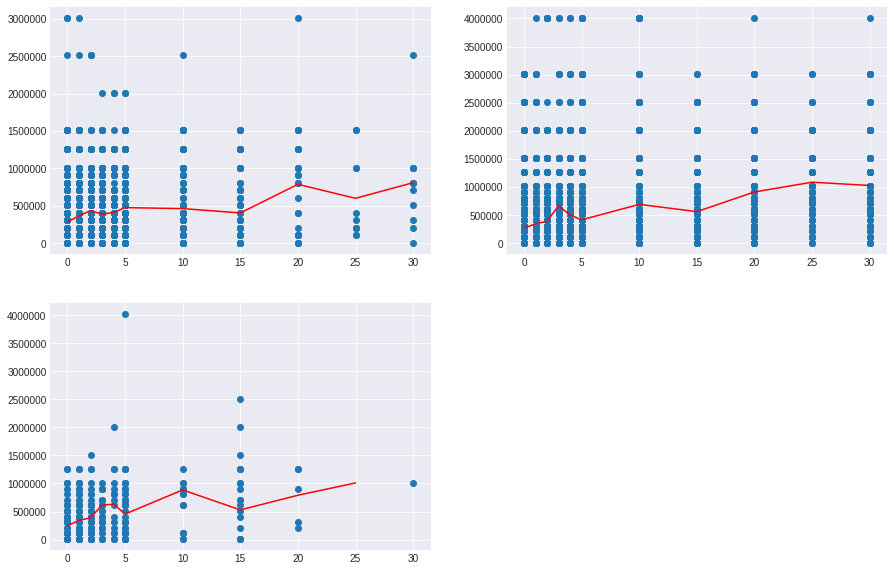

In [29]:
salary = data['Q9']
salary.fillna(0, inplace=True)
salary = np.asarray(salary)

yearsexp = data['Q8']
yearsexp.fillna(0, inplace=True)
yearsexp = np.asarray(yearsexp)


xx, yy, dat2 = plotx1x2(female_i,male_i,other_i,yearsexp,salary,'title')

### For this section there are three graphs each one consist of experience vs salary. For which the first one are females, then to the right are males and at the bottom others. For this graph a mean was taking to show a tendency, and its represented as the red line. As you can see for each graph at the start there is bump, an area in which it increases rapidly and then it decreases. This is seen before the 5 years’ experience. Then comparing each group the males do have a steady increase in salary for each year of experience, however for females they do decrease rapidly some time, however their salary in comparison tends to be less than the males,  is this the inequality done to women in salary? They do in percentage have more master degrees than males, or is it because most of them are students so this affects the results? As for the other group, it needs more data in order to further analyze it. 

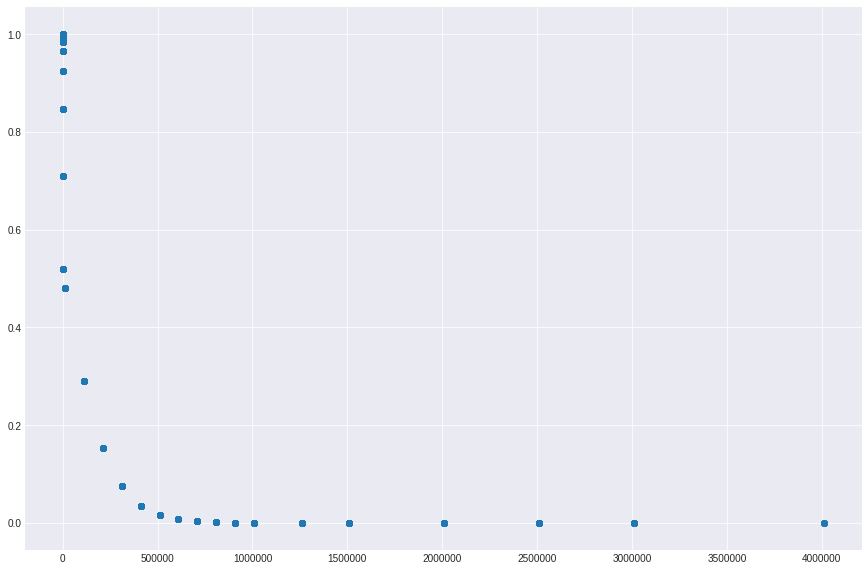

In [33]:
dat = []
for i in range(0,len(xx)):
    dat.append([xx[i], yy[i]])
    
dat = np.asarray(dat)
kf = KFold(n_splits=4)

cc =0
for train_index, test_index in kf.split(dat):
    X_train, X_test = dat[train_index], dat[test_index]
    y_train, y_test = dat2[train_index], dat2[test_index]
    clf = LogisticRegression(random_state=0, solver= 'lbfgs', multi_class = 'multinomial').fit(X_train, y_train)
    predictors = clf.predict_proba(X_test)
    if(cc==0):
        plt.figure()
        plt.scatter(X_test,predictors)
        plt.show()
        cc =1


# Conclusion
### In conclusion no one is better than the other one, each group have their difference as well as their equality, but interesting things were seen for each group, some things that could be reflected on. 
